In [4]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [12]:
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
df = pd.read_csv('/midterm-project/data1030-midterm/data/heart_disease_health_indicators_BRFSS2015.csv')

In [13]:
print('num of rows:',df.shape[0])
print('num of columns:',df.shape[1])
print('columns:',df.columns)
print('FEATURE DATA TYPE:')
print(df.dtypes)

num of rows: 253680
num of columns: 22
columns: Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
FEATURE DATA TYPE:
HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     flo

In [14]:
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('FRACTION OF MISSING VALUES:')
print(df.isnull().sum(axis=0)/df.shape[0])
print('FRACTION OF ROWS MISSING VALUES:',sum(df.isnull().sum(axis=1)!=0)/df.shape[0])

FRACTION OF MISSING VALUES:
HeartDiseaseorAttack    0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
Diabetes                0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64
FRACTION OF ROWS MISSING VALUES: 0.0


CONTINUOUS: 
BMI

CATEGORICAL: 
HeartDiseaseorAttack
HighBP
HighChol
CholCheck
Smoker
Stroke
Diabetes
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
NoDocbcCost
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
Education
Income
HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


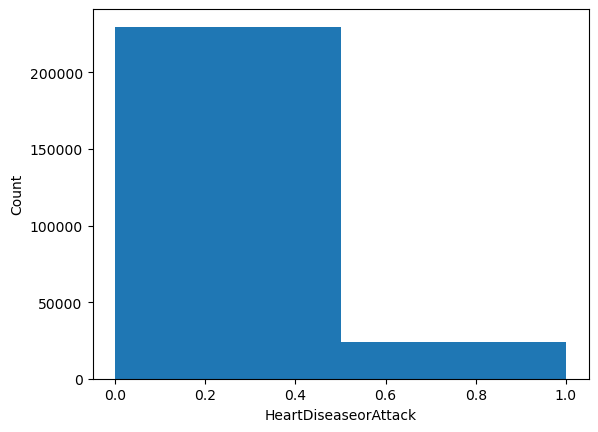

HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64


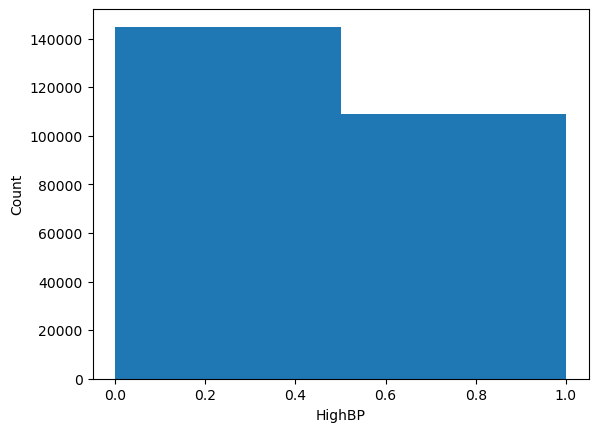

HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64


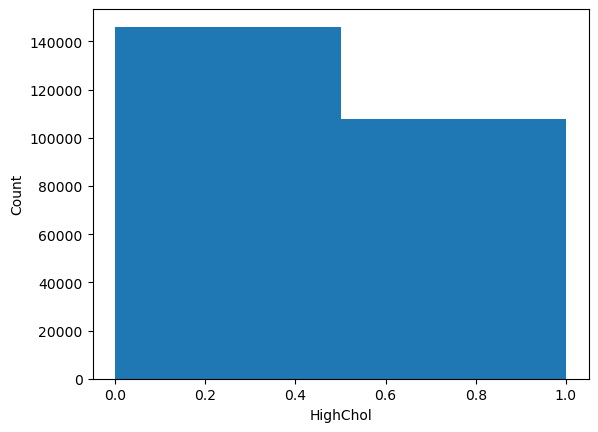

CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64


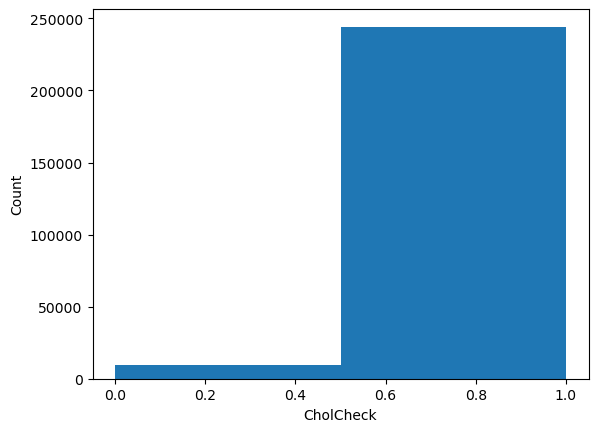

Smoker
0.0    141257
1.0    112423
Name: count, dtype: int64


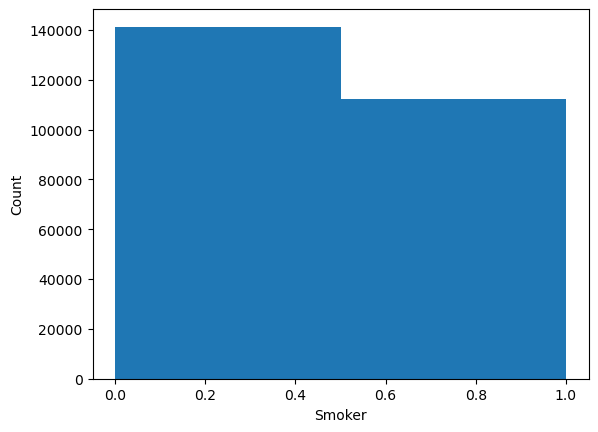

Stroke
0.0    243388
1.0     10292
Name: count, dtype: int64


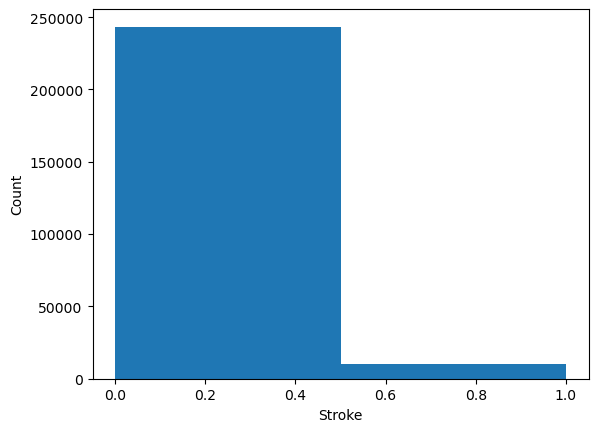

Diabetes
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


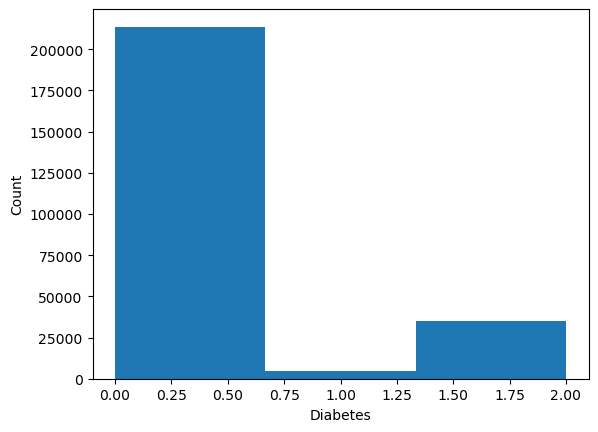

PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64


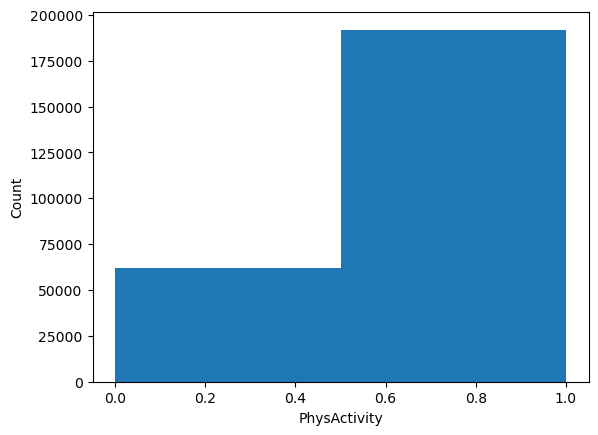

Fruits
1.0    160898
0.0     92782
Name: count, dtype: int64


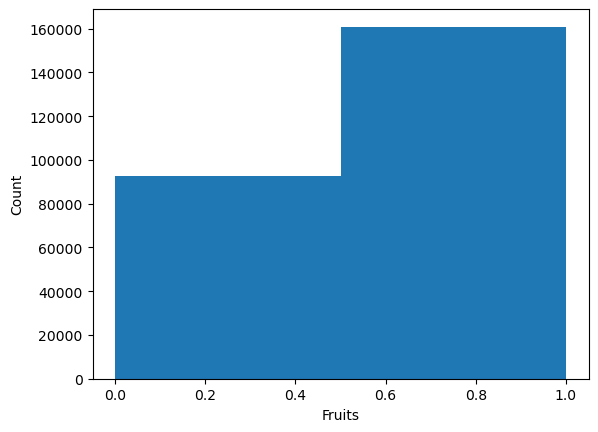

Veggies
1.0    205841
0.0     47839
Name: count, dtype: int64


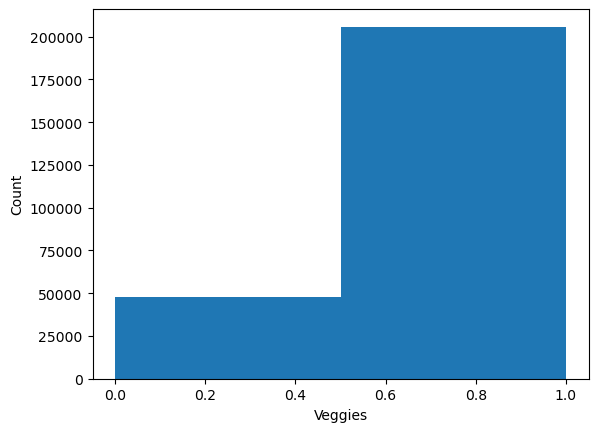

HvyAlcoholConsump
0.0    239424
1.0     14256
Name: count, dtype: int64


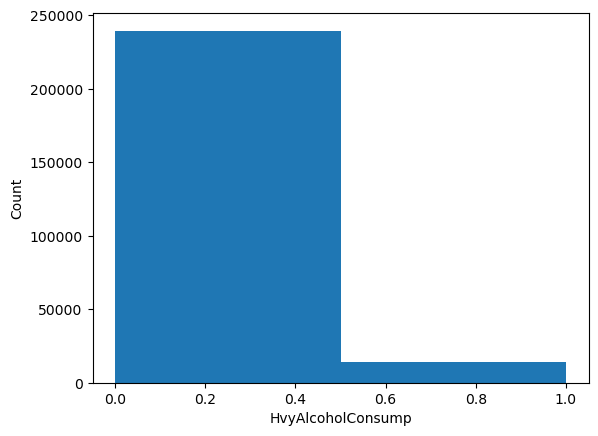

AnyHealthcare
1.0    241263
0.0     12417
Name: count, dtype: int64


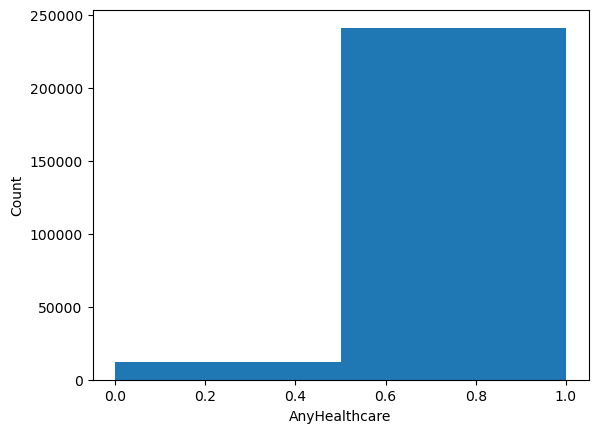

NoDocbcCost
0.0    232326
1.0     21354
Name: count, dtype: int64


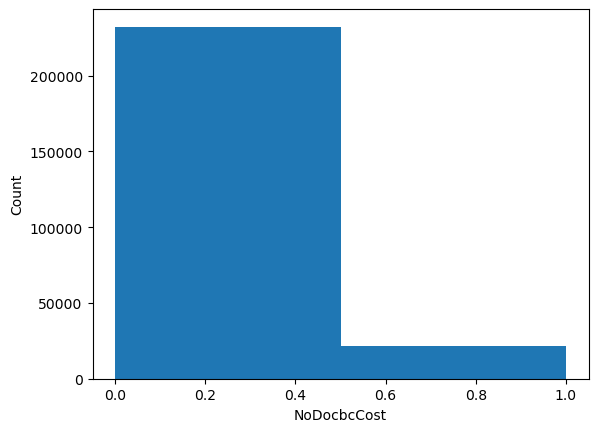

GenHlth
2.0    89084
3.0    75646
1.0    45299
4.0    31570
5.0    12081
Name: count, dtype: int64


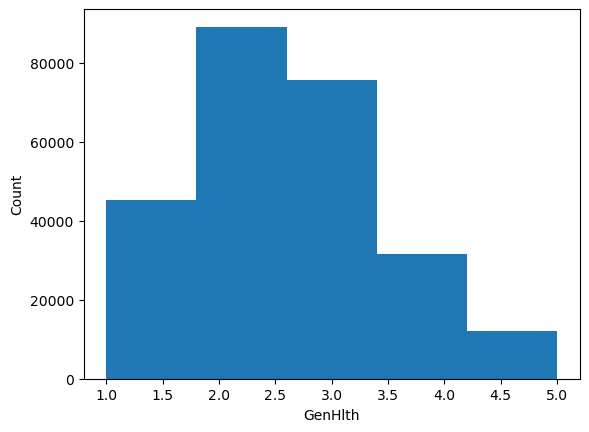

MentHlth
0.0     175680
2.0      13054
30.0     12088
5.0       9030
1.0       8538
3.0       7381
10.0      6373
15.0      5505
4.0       3789
20.0      3364
7.0       3100
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: count, dtype: int64


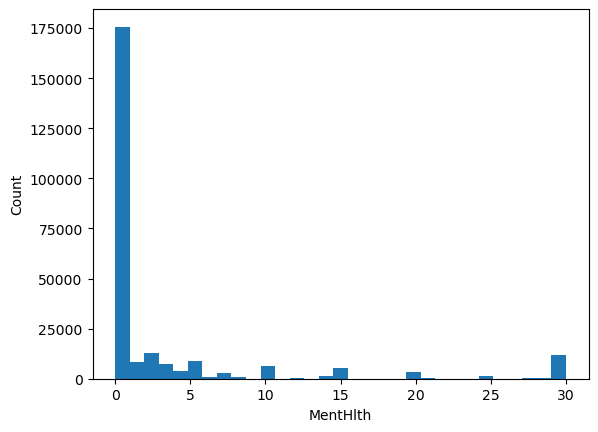

PhysHlth
0.0     160052
30.0     19400
2.0      14764
1.0      11388
3.0       8495
5.0       7622
10.0      5595
15.0      4916
4.0       4542
7.0       4538
20.0      3273
14.0      2587
25.0      1336
6.0       1330
8.0        809
21.0       663
12.0       578
28.0       522
29.0       215
9.0        179
18.0       152
16.0       112
27.0        99
17.0        96
24.0        72
22.0        70
26.0        69
13.0        68
11.0        60
23.0        56
19.0        22
Name: count, dtype: int64


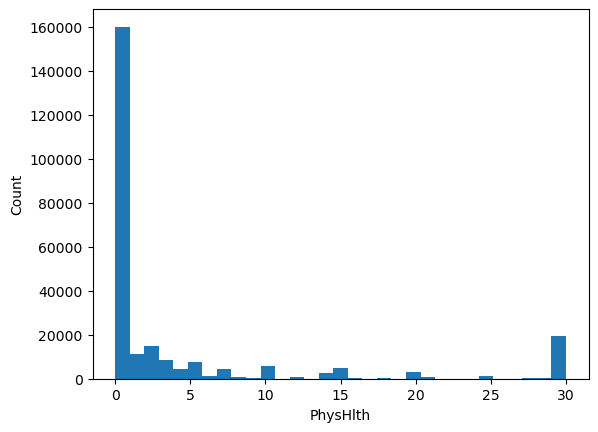

DiffWalk
0.0    211005
1.0     42675
Name: count, dtype: int64


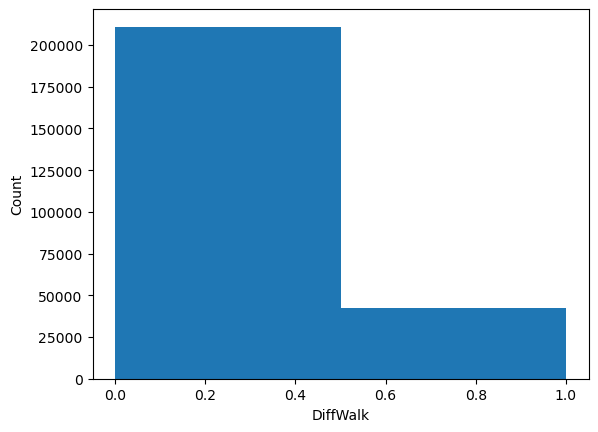

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64


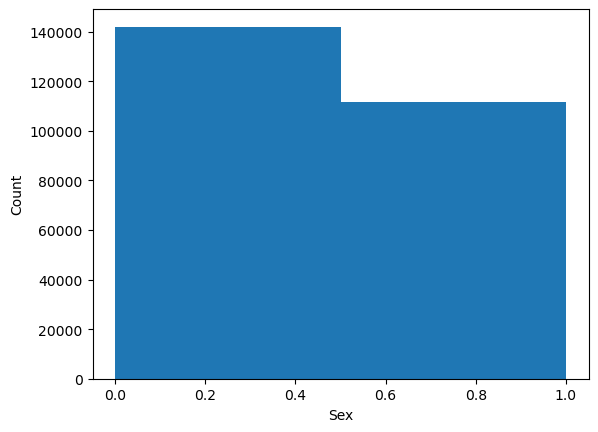

Age
9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: count, dtype: int64


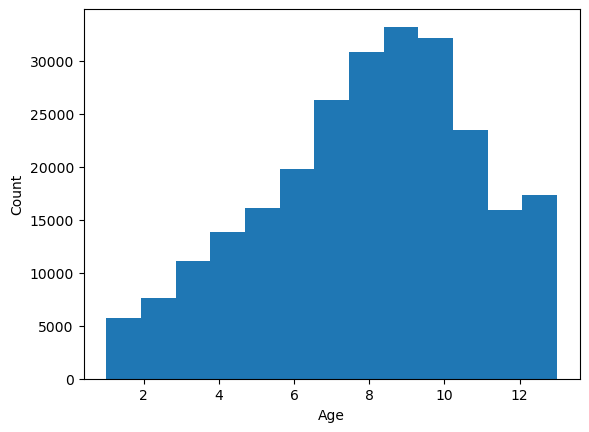

Education
6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: count, dtype: int64


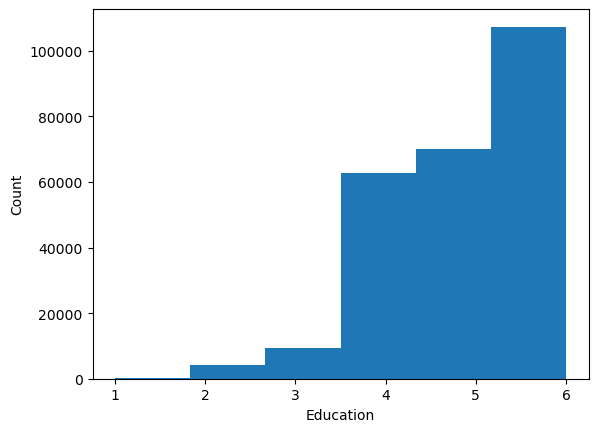

Income
8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: count, dtype: int64


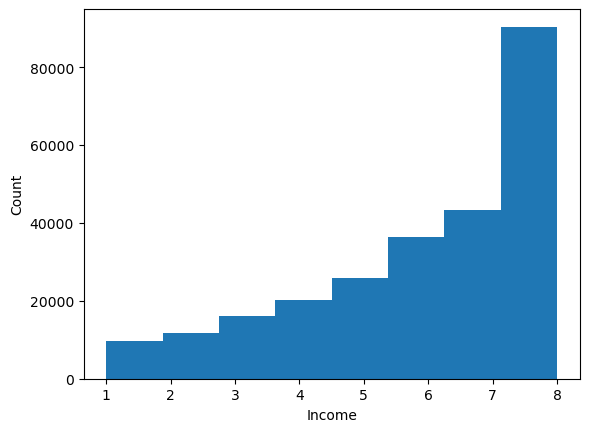

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64


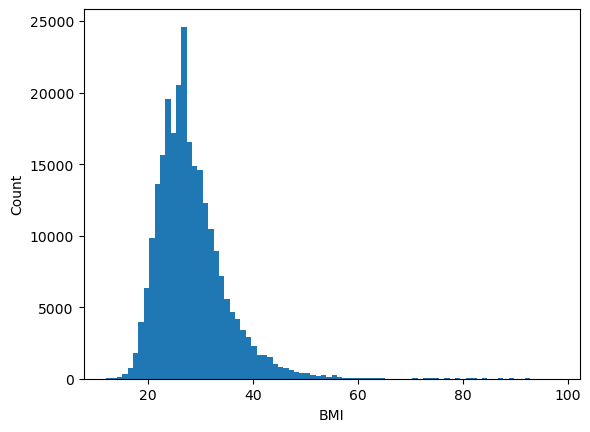

In [15]:
cont = ['BMI']
disc = ['HeartDiseaseorAttack','HighBP','HighChol','CholCheck','Smoker','Stroke',\
        'Diabetes','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare',\
        'NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']

print("CONTINUOUS: ")
[print(name) for name in cont]
print('')
print("CATEGORICAL: ")
[print(name) for name in disc]

for col in disc:
    print(df[col].value_counts())    
    plt.figure()
    df[col].plot.hist(bins=df[col].nunique())
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
for col in cont:
    print(df[col].describe())   
    plt.figure()
    df[col].plot.hist(bins=df[col].nunique())
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show() 

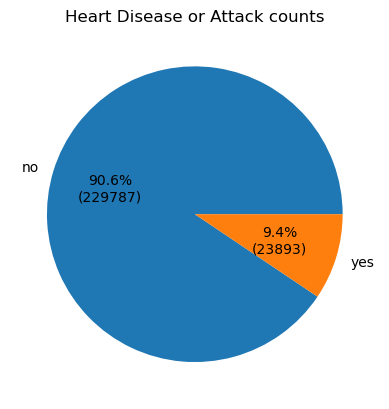

In [18]:
HDA_counts = df['HeartDiseaseorAttack'].value_counts()
labels = ['no','yes']
sizes = [HDA_counts[0]/HDA_counts.sum(),HDA_counts[1]/HDA_counts.sum()]
fig, ax = plt.subplots()
def perc_form(x):
    return '{:.1f}%\n({:.0f})'.format(x,HDA_counts.sum()*x/100)
ax.pie(sizes, labels=labels,autopct=perc_form)
plt.title('Heart Disease or Attack counts')
plt.savefig("target pie chart.png",dpi=300)

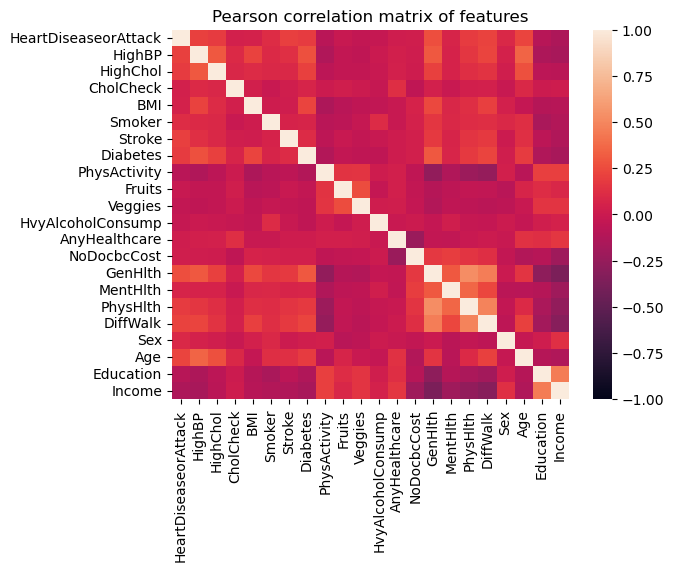

In [21]:
import seaborn as sns

corr_matrix = df.corr(method='pearson')
h_map = sns.heatmap(corr_matrix,vmin=-1,vmax=1).set(title='Pearson correlation matrix of features')
plt.savefig("correlation matrix.png",dpi=300)

In [22]:
pd.set_option('display.max_rows', None)
sorted_mat = corr_matrix.unstack().sort_values()
print(sorted_mat) 

Income                GenHlth                -0.370014
GenHlth               Income                 -0.370014
Income                DiffWalk               -0.320124
DiffWalk              Income                 -0.320124
Education             GenHlth                -0.284912
GenHlth               Education              -0.284912
PhysHlth              Income                 -0.266799
Income                PhysHlth               -0.266799
PhysActivity          GenHlth                -0.266186
GenHlth               PhysActivity           -0.266186
DiffWalk              PhysActivity           -0.253174
PhysActivity          DiffWalk               -0.253174
AnyHealthcare         NoDocbcCost            -0.232532
NoDocbcCost           AnyHealthcare          -0.232532
PhysActivity          PhysHlth               -0.219230
PhysHlth              PhysActivity           -0.219230
Income                MentHlth               -0.209806
MentHlth              Income                 -0.209806
Income    

                 no       yes
Excellent  0.977571  0.022429
Very Good  0.953662  0.046338
Good       0.895381  0.104619
Fair       0.786886  0.213114
Poor       0.660045  0.339955


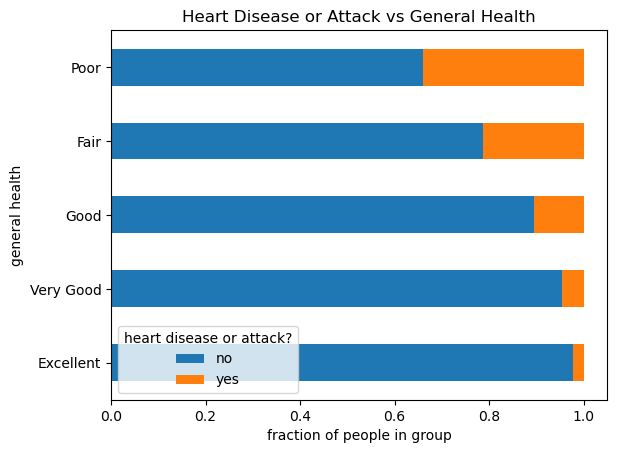

In [26]:
count_matrix = df.groupby(['GenHlth', 'HeartDiseaseorAttack']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm = count_matrix_norm.set_axis(['no','yes'],axis=1)
count_matrix_norm = count_matrix_norm.set_axis(['Excellent','Very Good','Good','Fair','Poor'],axis=0) 
print(count_matrix_norm)

count_matrix_norm.plot(kind='barh', stacked=True)
plt.xlabel('fraction of people in group')
plt.ylabel('general health')
plt.legend(title='heart disease or attack?',loc='lower left')
plt.title('Heart Disease or Attack vs General Health')
plt.savefig("heart vs genhlth",dpi=300)
plt.show()

             no       yes
18-24  0.994912  0.005088
25-29  0.992893  0.007107
30-34  0.988672  0.011328
35-39  0.986038  0.013962
40-44  0.978276  0.021724
45-49  0.964075  0.035925
50-54  0.945846  0.054154
55-59  0.926927  0.073073
60-64  0.898989  0.101011
65-69  0.869758  0.130242
70-74  0.832278  0.167722
75-79  0.806446  0.193554
80+    0.760468  0.239532


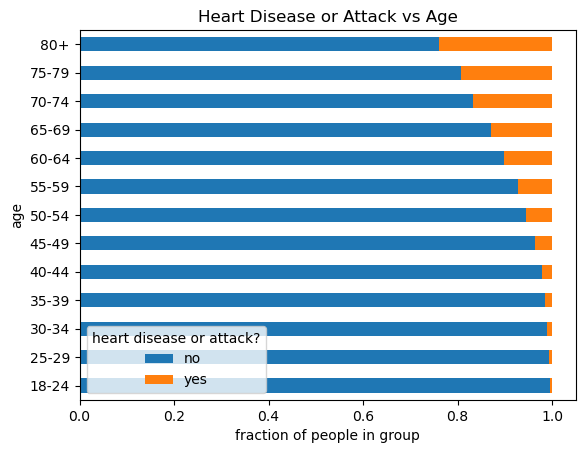

In [24]:
count_matrix = df.groupby(['Age', 'HeartDiseaseorAttack']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm = count_matrix_norm.set_axis(['no','yes'],axis=1)
count_matrix_norm = count_matrix_norm.set_axis(['18-24','25-29','30-34','35-39','40-44',\
                        '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+'],axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='barh', stacked=True)
plt.xlabel('fraction of people in group')
plt.xticks(rotation=0)
plt.ylabel('age')
plt.legend(title='heart disease or attack?',loc='lower left') 
plt.title('Heart Disease or Attack vs Age')
plt.show()

           no       yes
no   0.933755  0.066245
yes  0.767663  0.232337


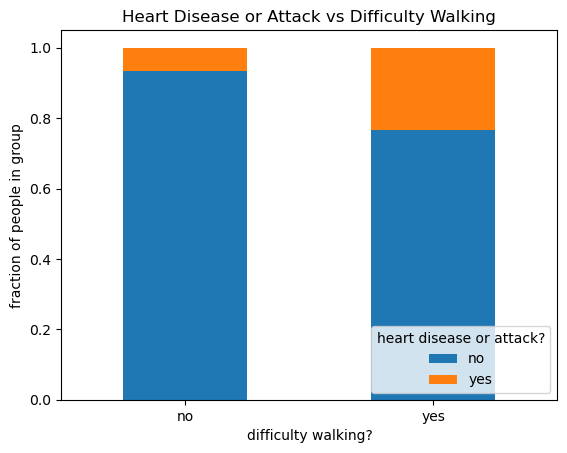

In [27]:
count_matrix = df.groupby(['DiffWalk', 'HeartDiseaseorAttack']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm = count_matrix_norm.set_axis(['no','yes'],axis=1)
count_matrix_norm = count_matrix_norm.set_axis(['no','yes'],axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('difficulty walking?')
plt.legend(title='heart disease or attack?',loc='lower right') 
plt.title('Heart Disease or Attack vs Difficulty Walking')
plt.xticks(rotation=0)
plt.show()

HeartDiseaseorAttack       0.0       1.0
AnyHealthcare                           
0.0                   0.929935  0.070065
1.0                   0.904573  0.095427
           no       yes
no   0.929935  0.070065
yes  0.904573  0.095427


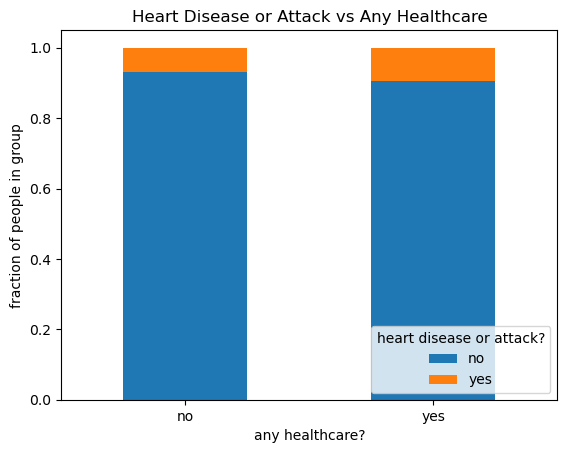

In [28]:
count_matrix = df.groupby(['AnyHealthcare', 'HeartDiseaseorAttack']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm = count_matrix_norm.set_axis(['no','yes'],axis=1)
count_matrix_norm = count_matrix_norm.set_axis(['no','yes'],axis=0) 
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('any healthcare?')
plt.xticks(rotation=0)
plt.legend(title='heart disease or attack?',loc='lower right') 
plt.title('Heart Disease or Attack vs Any Healthcare')
plt.show()

HeartDiseaseorAttack       0.0       1.0
CholCheck                               
0.0                   0.971383  0.028617
1.0                   0.903272  0.096728
           no       yes
no   0.971383  0.028617
yes  0.903272  0.096728


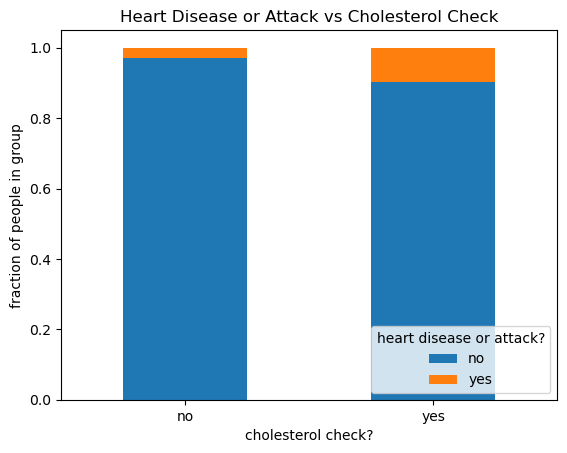

In [29]:
count_matrix = df.groupby(['CholCheck', 'HeartDiseaseorAttack']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm = count_matrix_norm.set_axis(['no','yes'],axis=1)
count_matrix_norm = count_matrix_norm.set_axis(['no','yes'],axis=0) 
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('cholesterol check?')
plt.xticks(rotation=0)
plt.legend(title='heart disease or attack?',loc='lower right') 
plt.title('Heart Disease or Attack vs Cholesterol Check')
plt.show()

HeartDiseaseorAttack       0.0       1.0
PhysActivity                            
0.0                   0.860865  0.139135
1.0                   0.920279  0.079721
           no       yes
no   0.860865  0.139135
yes  0.920279  0.079721


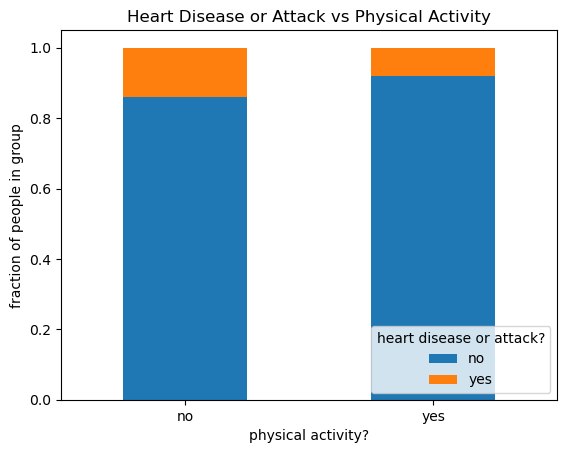

In [30]:
count_matrix = df.groupby(['PhysActivity', 'HeartDiseaseorAttack']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm = count_matrix_norm.set_axis(['no','yes'],axis=1)
count_matrix_norm = count_matrix_norm.set_axis(['no','yes'],axis=0) 
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.xlabel('physical activity?')
plt.xticks(rotation=0)
plt.legend(title='heart disease or attack?',loc='lower right') 
plt.title('Heart Disease or Attack vs Physical Activity')
plt.show()

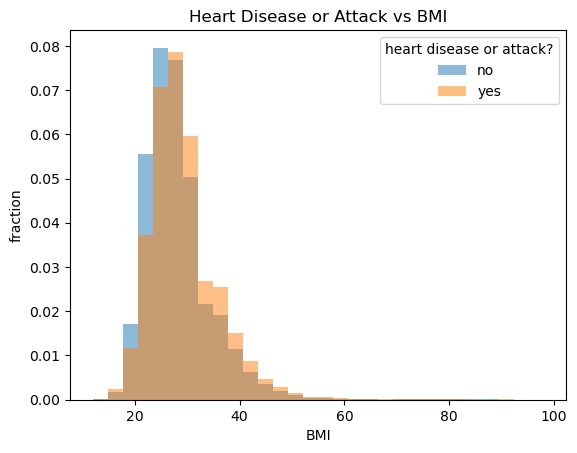

29.46662202318671
28.26962360794997


In [33]:
temp_df = df.replace({'HeartDiseaseorAttack':{0.0:'no',1.0:'yes'}})
categories = temp_df['HeartDiseaseorAttack'].unique()
bin_range = (temp_df['BMI'].min(),temp_df['BMI'].max())

for c in categories:
    plt.hist(temp_df[temp_df['HeartDiseaseorAttack']==c]['BMI'],alpha=0.5,label=c,range=bin_range,bins=30,density=True)
plt.legend(title='heart disease or attack?',loc='upper right') 
plt.ylabel('fraction')
plt.xlabel('BMI')
plt.title('Heart Disease or Attack vs BMI')
plt.savefig("heart vs bmi.png",dpi=300)
plt.show()

print(sum(temp_df[temp_df['HeartDiseaseorAttack']=='yes']['BMI'])/temp_df[temp_df['HeartDiseaseorAttack']=='yes'].shape[0])
print(sum(temp_df[temp_df['HeartDiseaseorAttack']=='no']['BMI'])/temp_df[temp_df['HeartDiseaseorAttack']=='no'].shape[0])

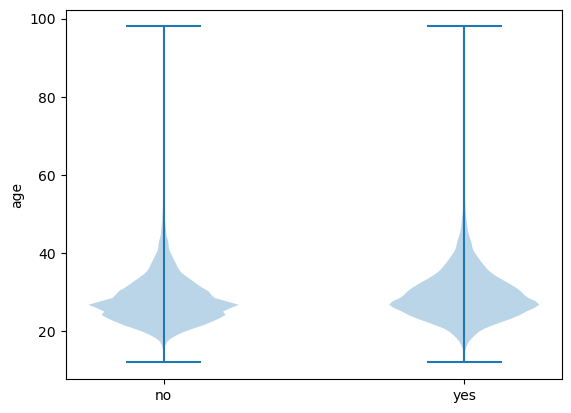

In [32]:
dataset = [df[df['HeartDiseaseorAttack']==0.0]['BMI'].values,
           df[df['HeartDiseaseorAttack']==1.0]['BMI'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['no','yes'])
plt.ylabel('age')
plt.show()